Загружаем библиотеки

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
file = '/content/train.csv'
train = pd.read_csv(file)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Смотрим данные

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Выводим графики

<Axes: xlabel='Pclass', ylabel='count'>

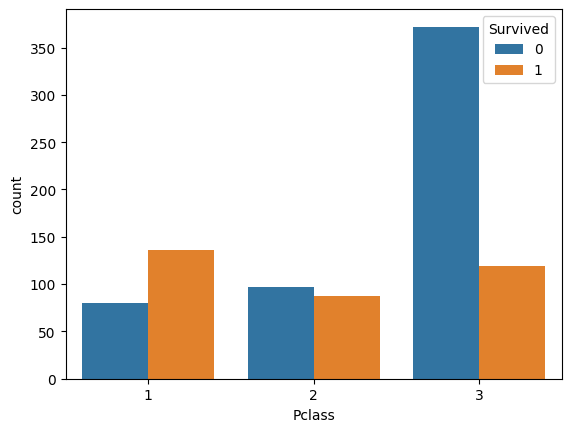

In [ ]:
sns.countplot(x= 'Pclass', hue = 'Survived', data = train)

Смотрим по полу, кто выжил

<Axes: xlabel='Sex', ylabel='count'>

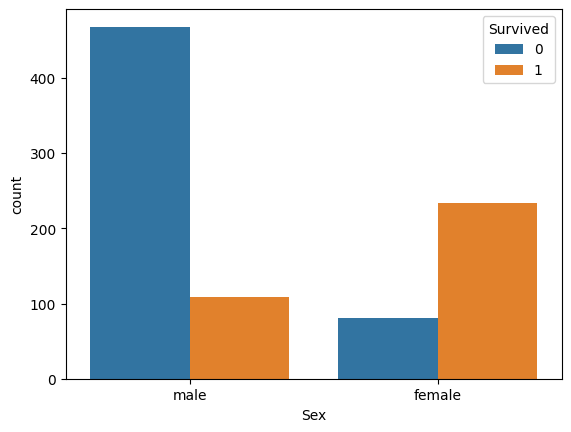

In [ ]:
sns.countplot(x= 'Sex', hue = 'Survived', data = train)

# Работа с отсутствующими данными

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.drop(columns='Cabin', axis=1, inplace=True)

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
pd.get_dummies(train['Sex']).head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

sex.head(3)

,male
0,True
1,False
2,False


In [ ]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

pclass = pd.get_dummies(train['Pclass'], drop_first= True)

Присоединяем новые данные

In [ ]:
train = pd.concat([train, pclass, sex, embarked], axis=1)

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True,False,False,True


In [ ]:
train.drop(['PassengerId','Pclass','Name','Sex','Ticket', 'Embarked'], axis=1, inplace=True)

train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True


# Нормализация данных

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

cols_to_scale = ['Age', 'Fare']

scaler.fit(train[cols_to_scale])

train[cols_to_scale] = scaler.transform(train[cols_to_scale])

train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,1,0.643971,1,0,0.788947,False,False,False,False,False
2,1,-0.281878,0,0,-0.486650,False,True,False,False,True


In [ ]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

In [ ]:
train.columns = train.columns.map(str)

# Шаг 2. Разделение обучающей выборки на признаки и целевую переменную

In [ ]:
X_train = train.drop('Survived', axis=1)

y_train = train['Survived']

X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,0.643971,1,0,0.788947,False,False,False,False,False
2,-0.281878,0,0,-0.486650,False,True,False,False,True


# Шаг 3. Обучение модели логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

LogisticRegression()

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
conf_matrix = confusion_matrix(y_train,y_pred_train)

conf_matrix_df = pd.DataFrame(conf_matrix)

In [ ]:
conf_matrix_df

,0,1
0,479,70
1,103,237


In [ ]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns=['Прогноз погиб', 'Прогноз выжил'], index = ['Факт поиб', 'Факт выжил'])

In [ ]:
conf_matrix_labels

,Прогноз погиб,Прогноз выжил
Факт поиб,479,70
Факт выжил,103,237


In [ ]:
model_accuracy = accuracy_score(y_train, y_pred_train)

round(model_accuracy, 3)

0.805

Формируем тестовые данные

In [ ]:
file = '/content/test.csv'
test = pd.read_csv(file)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   2       418 non-null    bool   
 5   3       418 non-null    bool   
 6   male    418 non-null    bool   
 7   Q       418 non-null    bool   
 8   S       418 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 15.2 KB


In [ ]:
X_test = test



X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())



sex = pd.get_dummies(X_test['Sex'], drop_first= True)
embarked = pd.get_dummies(X_test['Embarked'], drop_first=True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first= True)




In [ ]:
X_test = pd.concat([test, pclass, sex, embarked], axis=1)

X_test.drop(['PassengerId','Pclass','Name','Sex','Ticket', 'Embarked','Cabin'], axis=1, inplace=True)

X_test.columns = X_test.columns.map(str)

X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,False,True,True,True,False
1,47.0,1,0,7.0000,False,True,False,False,True
2,62.0,0,0,9.6875,True,False,True,True,False


In [ ]:
X_train[:3]

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,0.643971,1,0,0.788947,False,False,False,False,False
2,-0.281878,0,0,-0.486650,False,True,False,False,True


In [ ]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])



In [ ]:
y_pred_test = model.predict(X_test)


In [ ]:
y_pred_test[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'

example = pd.read_csv(url)

example.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [ ]:
ids = test['PassengerId']

result = pd.DataFrame({'PassengerId': ids, 'Survived':y_pred_test})

result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
result.to_csv('result.csv', index=False)